<a href="https://colab.research.google.com/github/RiseAboveAll/Code_fiesta.gihub.io/blob/master/Pytorch_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression - Basic

In [ ]:
# Equation of Line y=w*x + b

w=torch.tensor(3.0,requires_grad=True)
b=torch.tensor(0.01,requires_grad=True)



In [ ]:
def forward(x):
  y=w*x+b
  return y

In [ ]:
x=torch.tensor(2.0)
forward(x)

tensor(6.0100, grad_fn=<AddBackward0>)

In [ ]:
x=torch.tensor([[2.0],[3]])
forward(x)

tensor([[6.0100],
        [9.0100]], grad_fn=<AddBackward0>)

# Linear Class

In [ ]:
#@title Set seed for generating random numbers , when we construct model using nn.Linear , it will be given random values for weights and biases for Linear class.Hence to make random values consistent we initializes seed  
torch.manual_seed(1)

In [ ]:
# Create Linear Object
model=nn.Linear(in_features=1,out_features=1,bias=True)

In [ ]:
print(model.bias,model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [ ]:
x=torch.tensor([[2.0],[3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


# Custom Module

In [2]:
# We will use inheritance that this class inherit the base class nn.Module, we inherit methods from this parent class 
class LR(nn.Module):
  def __init__(self,input_size=1,output_size=1):# __init__ is a constructor 
    # For inheritance from parent class use super()
    super().__init__()
    #object we want to initialize
    self.Linear=nn.Linear(input_size,output_size)
  def forward(self,x):
    pred=self.Linear(x)
    return pred
    


In [3]:
torch.manual_seed(1)
model=LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [4]:
x=torch.tensor([2.1])
model.forward(x)

tensor([0.6407], grad_fn=<AddBackward0>)

# Creating Dataset

In [2]:
#torch.randn(rows,cols)
x=torch.randn(100,1)*10
y=x + torch.randn(100,1)

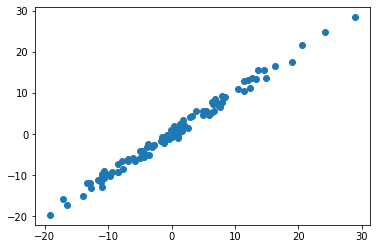

In [3]:
plt.scatter(x,y)

In [4]:
# We will use inheritance that this class inherit the base class nn.Module, we inherit methods from this parent class 
class LR(nn.Module):
  def __init__(self,input_size=1,output_size=1):# __init__ is a constructor 
    # For inheritance from parent class use super()
    super().__init__()
    #object we want to initialize
    self.Linear=nn.Linear(input_size,output_size)
  def forward(self,x):
    pred=self.Linear(x)
    return pred
    


In [5]:
torch.manual_seed(1)
model=LR(1,1)
[w,b]=model.parameters()
print(w,b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [6]:
#@title Adding .item() method returns python numbers
w1=w[0][0].item() # alternative is w[0,0]
b1=b[0].item()

In [7]:
def get_params():
  return (w[0,0].item(),b[0].item())

In [8]:
def plot_fit(title):
  plt.title=title
  w1,b1=get_params()
  x1=np.array([-30,30])
  y1=w1*x1+b1
  plt.plot(x1,y1,'r')
  plt.scatter(x,y)
  plt.show()

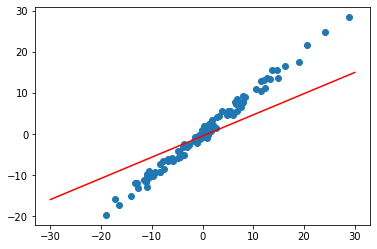

In [9]:
plot_fit('Initial Model')

 **This is not the line which best fits the data , we need to use optimisation model to get best fit line**

# Loss Function

- Gradient of the error function should take us in the direction of the greatest increase in error , so naturally moving towards negative of the cost function , we move in the direction of dreatest descent.

- Error depends on the weights and bias

- Hence for gradient descent we take partial derivative of error function wrt weights(w) and bias (b). dL/dw=-2x(y-y_hat);dL/db=-2(y-y_hat)

- w_u=w_o-(a*dL/dw) ; b_u=b_o - (a*dL/db)

- This Gradient Descent is batch gradient descent which updates the weights and bias of whole data set, where as **Stochastic Gradient Descent** minimizes the total loss one sample at a time , it reaches convergence much faster as it frequently updates the weights of the model of the same sample size 



In [10]:
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=.001,momentum=.07)


As the number of epochs increases , the more time it is able to update the weights of the neural network, which hence minimizes the error and produces optimal results!

If it is too many epochs, it can lead to overfitting !



In [11]:
epochs=100
losses=[]
for i in range(epochs):
  
  y_pred=model.forward(x)
  loss= criterion(y_pred,y)
  print('epoch :',i,'Loss :',loss.item())
  losses.append(loss)
  #compute the gradient of loss wrt parameters
  optimizer.zero_grad()
  loss.backward()
  #update the parameters
  optimizer.step()



epoch : 0 Loss : 22.276521682739258
epoch : 1 Loss : 15.575677871704102
epoch : 2 Loss : 10.660954475402832
epoch : 3 Loss : 7.405991077423096
epoch : 4 Loss : 5.272241115570068
epoch : 5 Loss : 3.8748481273651123
epoch : 6 Loss : 2.9596266746520996
epoch : 7 Loss : 2.360037326812744
epoch : 8 Loss : 1.9670552015304565
epoch : 9 Loss : 1.7093141078948975
epoch : 10 Loss : 1.5401004552841187
epoch : 11 Loss : 1.428836464881897
epoch : 12 Loss : 1.3555076122283936
epoch : 13 Loss : 1.307011604309082
epoch : 14 Loss : 1.2747728824615479
epoch : 15 Loss : 1.253177285194397
epoch : 16 Loss : 1.2385514974594116
epoch : 17 Loss : 1.2284891605377197
epoch : 18 Loss : 1.2214163541793823
epoch : 19 Loss : 1.216302752494812
epoch : 20 Loss : 1.2124732732772827
epoch : 21 Loss : 1.209486484527588
epoch : 22 Loss : 1.207053780555725
epoch : 23 Loss : 1.2049853801727295
epoch : 24 Loss : 1.2031577825546265
epoch : 25 Loss : 1.2014892101287842
epoch : 26 Loss : 1.1999273300170898
epoch : 27 Loss : 1.

Text(0, 0.5, 'Loss')

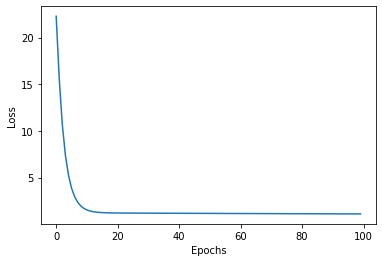

In [12]:
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

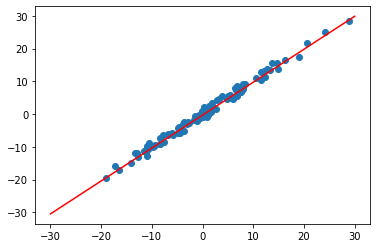

In [13]:
plot_fit('Trained Model')